# Microsoft : Classifying Cybersecurity Incidents with Machine Learning

## 

# Train Dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration and Understanding

In [2]:
df_train = pd.read_csv('GUIDE_Train.csv')
df_train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
df_train.iloc[0]

Id                                180388628218
OrgId                                        0
IncidentId                                 612
AlertId                                 123247
Timestamp             2024-06-04T06:05:15.000Z
DetectorId                                   7
AlertTitle                                   6
Category                         InitialAccess
MitreTechniques                            NaN
IncidentGrade                     TruePositive
ActionGrouped                              NaN
ActionGranular                             NaN
EntityType                                  Ip
EvidenceRole                           Related
DeviceId                                 98799
Sha256                                  138268
IpAddress                                   27
Url                                     160396
AccountSid                              441377
AccountUpn                              673934
AccountObjectId                         425863
AccountName  

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [5]:
pd.set_option('display.max_columns', None)
df_train.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3


In [6]:
df_train.nunique()

Id                     730778
OrgId                    5769
IncidentId             466151
AlertId               1265644
Timestamp              760944
DetectorId               8428
AlertTitle              86149
Category                   20
MitreTechniques          1193
IncidentGrade               3
ActionGrouped               3
ActionGranular             16
EntityType                 33
EvidenceRole                2
DeviceId                75826
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             358401
AccountUpn             530183
AccountObjectId        343516
AccountName            368250
DeviceName             114541
NetworkMessageId       375196
EmailClusterId          26474
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
ThreatFamily             1745
FileName               222085
FolderPath

In [7]:
### Checking Null values

df_train.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [8]:
### Checking duplicate values

df_train.duplicated().sum()

22559

In [9]:
df_train.drop_duplicates(inplace=True)

In [10]:
print(df_train.duplicated().sum())

0


In [11]:
df_train.shape

(9494278, 45)

## Data Cleaning

### a) Checking Missing Values

In [12]:
### Remove columns those more than 50% of missing values

missing_percentage = df_train.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_cleaned = df_train.drop(columns=columns_to_drop)

In [13]:
data_cleaned.shape

(9494278, 35)

In [14]:
data_cleaned.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51322
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [15]:
data_cleaned.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive', nan],
      dtype=object)

In [16]:
data_cleaned.dropna(subset=['IncidentGrade'], inplace=True)

In [17]:
data_cleaned.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

In [18]:
print(data_cleaned.shape)
data_cleaned.head()

(9442956, 35)


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [19]:
data_cleaned.nunique()

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
Timestamp              755654
DetectorId               7813
AlertTitle              79952
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State     

In [20]:
print(data_cleaned.shape)
print(data_cleaned.Id.nunique())

(9442956, 35)
707108


In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9442956 entries, 0 to 9516836
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

### b) Data-Time Conversion

In [22]:
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])

In [23]:
data_cleaned['Timestamp'].head()

0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [24]:
# Extract day, month, and hour from the Timestamp

data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour
data_cleaned['Day'] = data_cleaned['Timestamp'].dt.day
data_cleaned['Month'] = data_cleaned['Timestamp'].dt.month
# data_cleaned['Year'] = data_cleaned['Timestamp'].dt.year

# Drop the original Timestamp column

data_cleaned.drop('Timestamp', axis=1, inplace=True)
print(data_cleaned.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0      InitialAccess    TruePositive         Ip      Related     98799   
1       Exfiltration   FalsePositive       User     Impacted     98799   
2      InitialAccess   FalsePositive        Url      Related     98799   
3  CommandAndControl  BenignPositive        Url      Related     98799   
4          Execution    TruePositive       User     Impacted     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  \
0  138268         27  160396      441377      673

## EDA

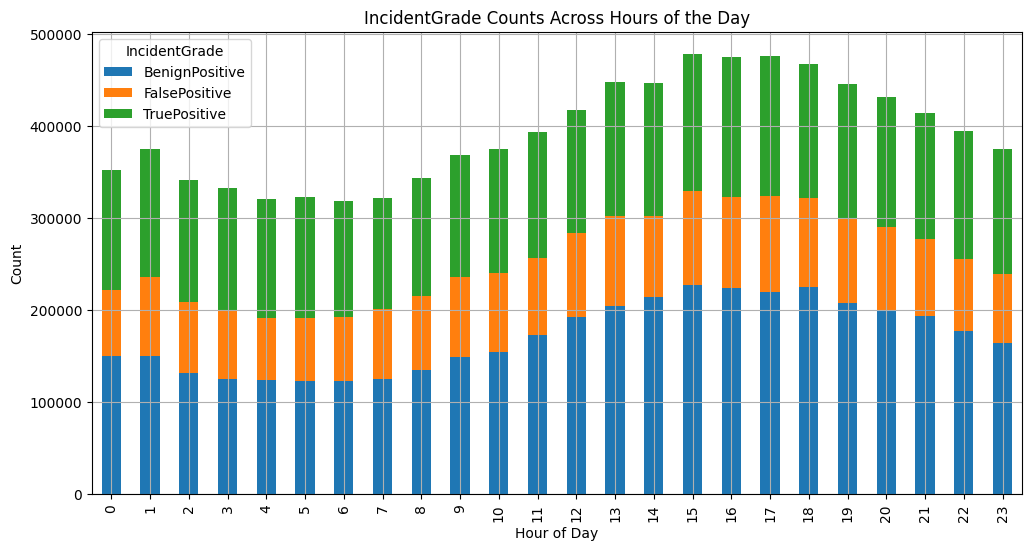

In [25]:
# Aggregate data
hour_incident_grade = data_cleaned.groupby(['Hour', 'IncidentGrade']).size().unstack()

# Plot
hour_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

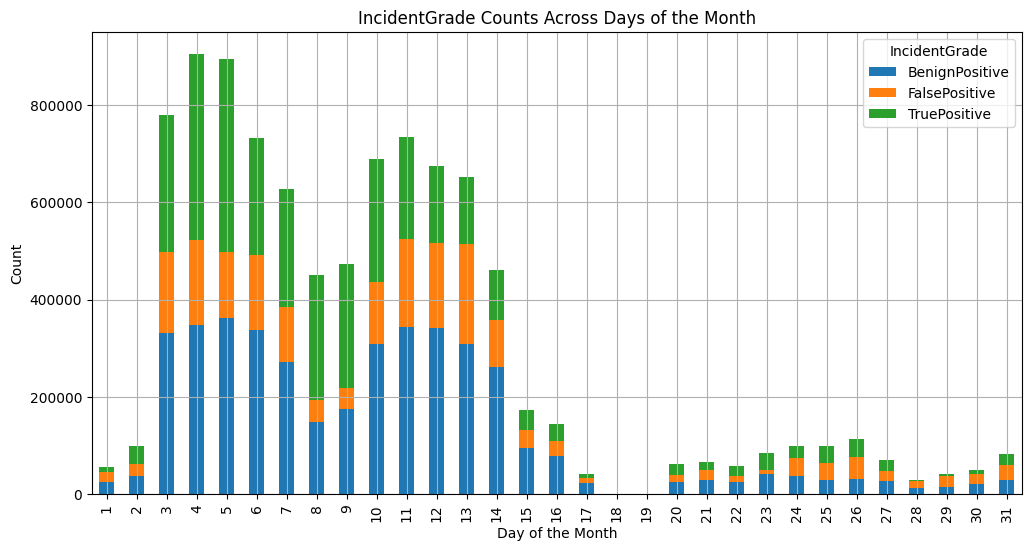

In [26]:
# Aggregate data
day_incident_grade = data_cleaned.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

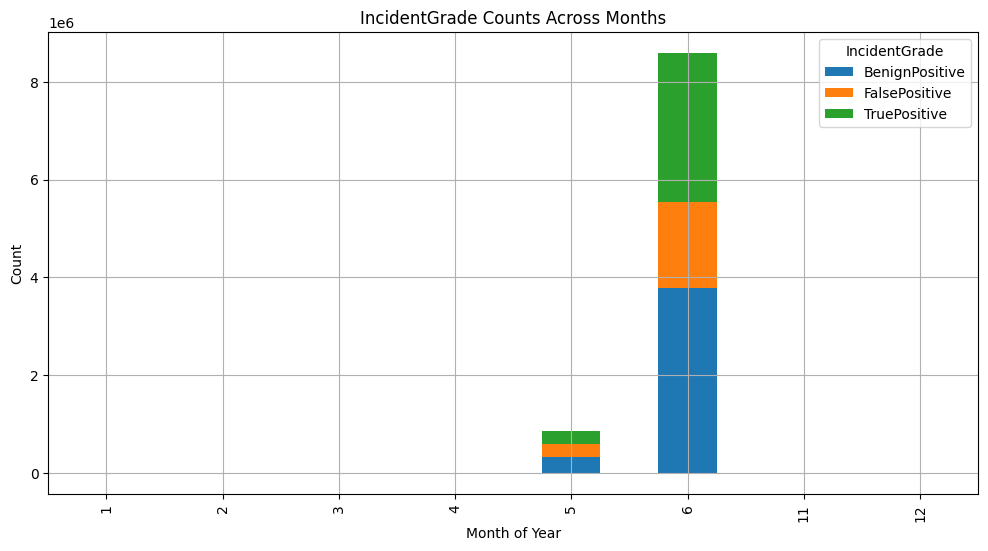

In [27]:
# Aggregate data
month_incident_grade = data_cleaned.groupby(['Month', 'IncidentGrade']).size().unstack()

# Plot
month_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Months')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

## Feature Selection and Engineering

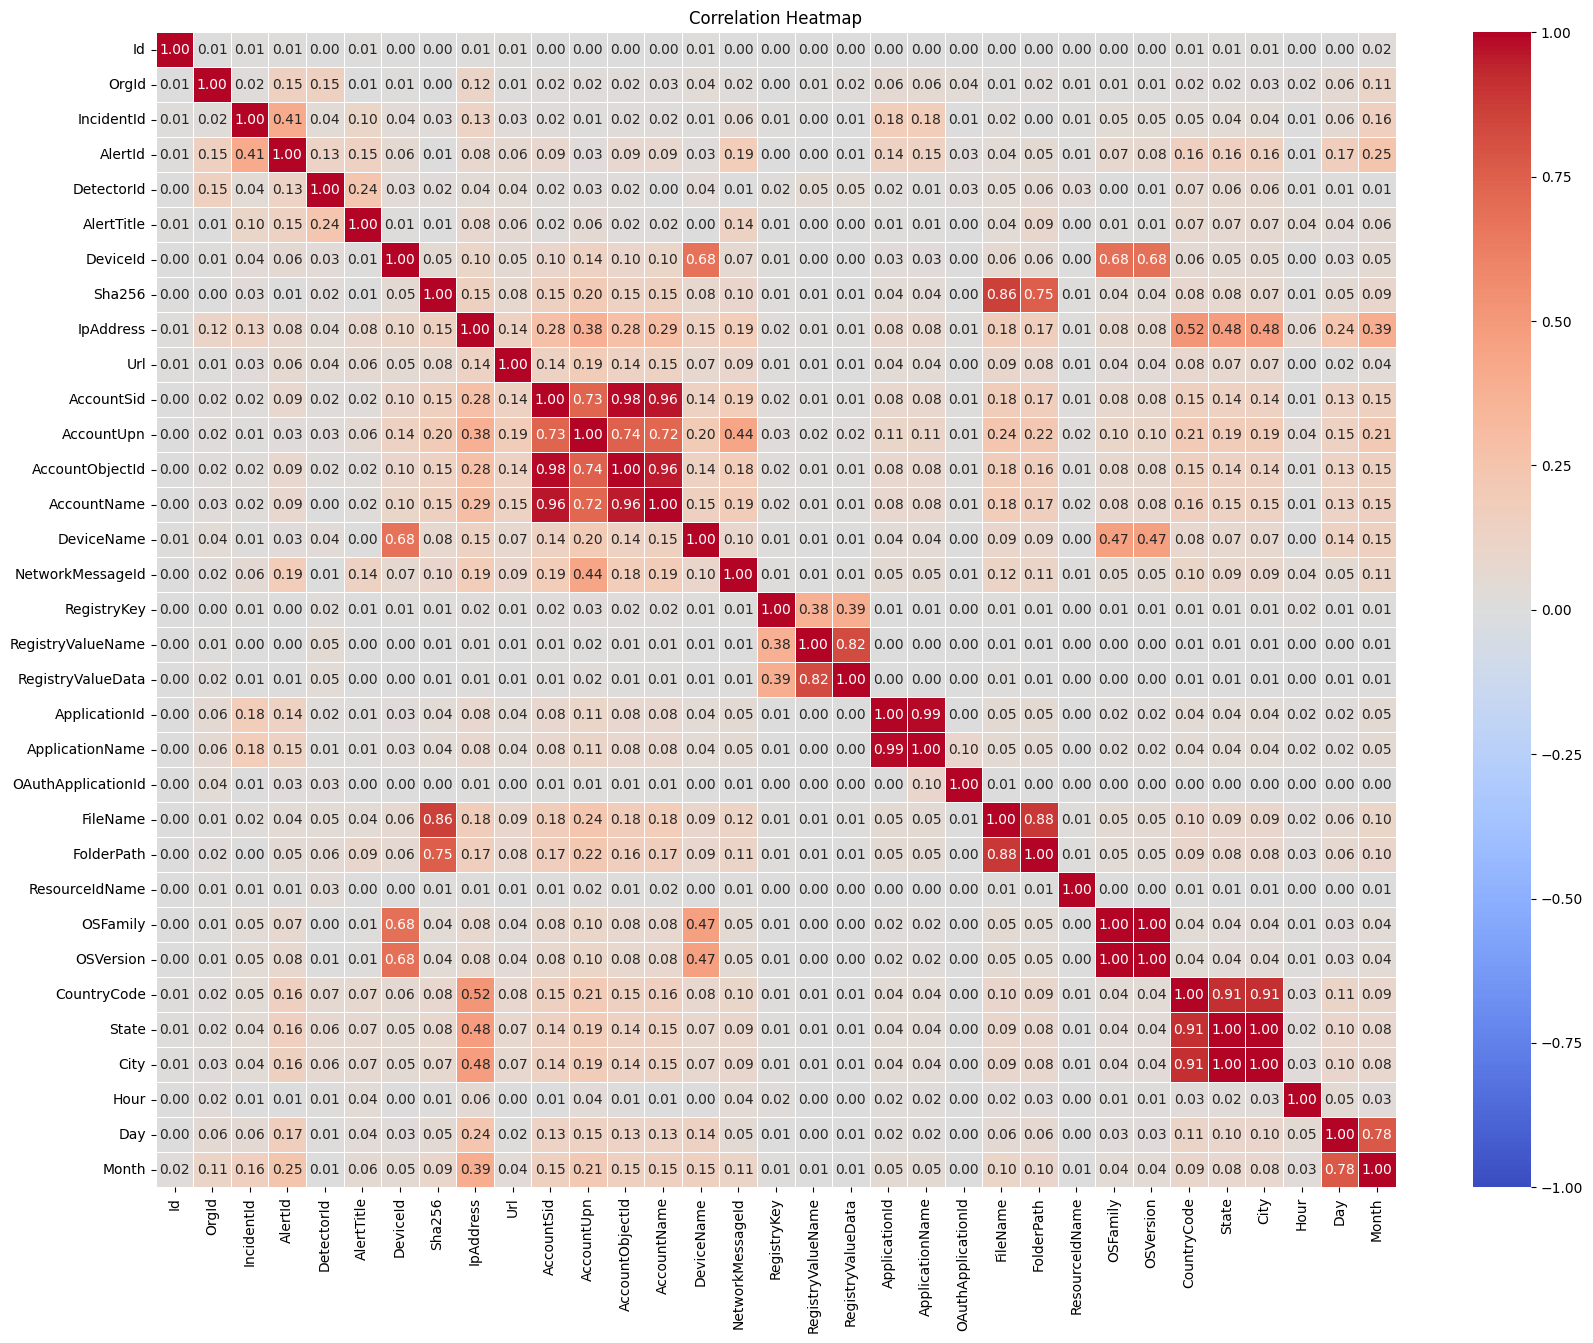

In [28]:
# Select numerical columns
numerical_df = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y]) 
                    for x, y in zip(*high_corr_var) 
                    if x != y and x < y]

# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    columns_to_remove.add(col2)  # or col1, based on your strategy

# Convert to list
columns_to_remove = list(columns_to_remove)
# print(columns_to_remove)

# Drop the redundant columns
df_cleaned_corr = data_cleaned.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
print(df_cleaned_corr.head())

Columns removed: ['State', 'FolderPath', 'RegistryValueData', 'OSVersion', 'FileName', 'City', 'ApplicationName', 'AccountObjectId', 'AccountName']
              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0      InitialAccess    TruePositive         Ip      Related     98799   
1       Exfiltration   FalsePositive       User     Impacted     98799   
2      InitialAccess   FalsePositive        Url      Related     98799   
3  CommandAndControl  BenignPositive        Url      Related     98799   
4          Execution    TruePositive       User  

In [30]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr

categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

   Category  IncidentGrade  EntityType  EvidenceRole  DeviceId  Sha256  \
0        10              2          15             1     98799  138268   
1         7              1          32             0     98799  138268   
2        10              1          31             1     98799  138268   
3         1              0          31             1     98799  138268   
4         6              2          32             0     98799  138268   

   IpAddress     Url  AccountSid  AccountUpn  DeviceName  NetworkMessageId  \
0         27  160396      441377      673934

In [31]:
import joblib

# Save label encoders for categorical features
for column, le in label_encoders.items():
    joblib.dump(le, f'labels/{column}_label_encoder.pkl')

Just saving for easy use: processed removing duplicates, null values and converted datetime

Also removed one of the co-related features to avoid multi colinearlity 

Also label encoded and saved them in pkl and now saving to csv)

In [32]:
# df_cleaned_corr.to_csv('train_data_processed.csv', index=False)

In [33]:
df_cleaned_corr.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Hour,Day,Month
0,180388628218,0,612,123247,7,6,10,2,15,1,98799,138268,27,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,31,6,4,6
1,455266534868,88,326,210035,58,43,7,1,32,0,98799,138268,360606,160396,22406,23032,153085,529644,1631,635,2251,881,3586,5,242,3,14,6
2,1056561957389,809,58352,712507,423,298,10,1,31,1,98799,138268,360606,68652,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,4,13,6
3,1279900258736,92,32992,774301,2,2,1,0,31,1,98799,138268,360606,13,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,16,10,6
4,214748368522,148,4359,188041,9,74,6,2,32,0,98799,138268,360606,160396,449,592,153085,529644,1631,635,2251,881,3586,5,242,1,15,6


# Test Dataset

In [34]:
df_test = pd.read_csv('GUIDE_Test.csv')
df_test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23732\280929648.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [35]:
df_test.drop_duplicates(inplace=True)

In [36]:
df_test.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307084
IncidentGrade               0
ActionGrouped         4145975
ActionGranular        4145975
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106182
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116518
FileName                    0
FolderPath

In [37]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

In [38]:
# Extract day, month, and hour from the Timestamp
df_test['Day'] = df_test['Timestamp'].dt.day
df_test['Month'] = df_test['Timestamp'].dt.month
df_test['Hour'] = df_test['Timestamp'].dt.hour

# Drop the original Timestamp column
df_test.drop('Timestamp', axis=1, inplace=True)

# Check the new DataFrame
print(df_test.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped ActionGranular         EntityType EvidenceRole  DeviceId  \
0           NaN            NaN               User   

In [39]:
df_test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'], axis=1, inplace= True)

In [40]:
df_test.drop('Usage', axis=1, inplace=True)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   MitreTechniques     object 
 8   IncidentGrade       object 
 9   ActionGrouped       object 
 10  ActionGranular      object 
 11  EntityType          object 
 12  EvidenceRole        object 
 13  DeviceId            int64  
 14  Sha256              int64  
 15  IpAddress           int64  
 16  Url                 int64  
 17  AccountSid          int64  
 18  AccountUpn          int64  
 19  DeviceName          int64  
 20  NetworkMessageId    int64  
 21  EmailClusterId      float64
 22  RegistryKey         int64  
 23  RegistryValueName   int64  
 24  ApplicationId       int64  
 

In [42]:
df_test = df_test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,153085,529644,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,2833,529644,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,153085,529644,1631,635,2251,881,3586,5,242,6,6,17


In [43]:
# Load label encoder

label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']  # list your categorical columns
for column in categorical_cols:
    label_encoders[column] = joblib.load(f'labels/{column}_label_encoder.pkl')

In [44]:
# Apply label encoding to categorical features

for column, le in label_encoders.items():
    if column in df_test.columns:
        df_test[column] = le.transform(df_test[column])

df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,32,0,98799,138268,360606,160396,2610,3699,153085,529644,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,19,0,1239,138268,360606,160396,441377,673934,2833,529644,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,27,1,98799,4296,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,32,0,98799,138268,360606,160396,133549,673934,153085,529644,1631,635,2251,881,3586,5,242,6,6,17


In [45]:
# df_test.to_csv('test_data_processed.csv', index=False)